In [1]:
from supar import Parser
import torch
import networkx as nx

In [2]:
torch.cuda.set_device('cuda:0')

In [3]:
sem = Parser.load('sdp-vi-en')

In [4]:
semantic_tree = sem.predict(['I', 'saw', 'Sarah', 'with', 'a', 'telescope','.'], verbose=False)[0]

In [16]:
semantic_tree

1	I	_	_	_	_	_	_	2:ARG1	_
2	saw	_	_	_	_	_	_	0:root|2:ARG1	_
3	Sarah	_	_	_	_	_	_	2:ARG2	_
4	with	_	_	_	_	_	_	_	_
5	a	_	_	_	_	_	_	_	_
6	telescope	_	_	_	_	_	_	4:ARG2|5:BV	_
7	.	_	_	_	_	_	_	punct	_

In [5]:
semantic_tree.values

[('1', '2', '3', '4', '5', '6', '7'),
 ('I', 'saw', 'Sarah', 'with', 'a', 'telescope', '.'),
 ('_', '_', '_', '_', '_', '_', '_'),
 ('_', '_', '_', '_', '_', '_', '_'),
 ('_', '_', '_', '_', '_', '_', '_'),
 ('_', '_', '_', '_', '_', '_', '_'),
 ('_', '_', '_', '_', '_', '_', '_'),
 ('_', '_', '_', '_', '_', '_', '_'),
 ['2:ARG1', '0:root|2:ARG1', '2:ARG2', '_', '_', '4:ARG2|5:BV'],
 ('_', '_', '_', '_', '_', '_', '_')]

In [6]:
semantic_graph = nx.DiGraph()

In [7]:
for i in range(len(semantic_tree.values[1])):
    semantic_graph.add_node(i+1, word=semantic_tree.values[1][i])

In [8]:
if len(semantic_tree.values[8]) == len(semantic_tree.values[1])-1:
    semantic_tree.values[8].append('punct')

In [9]:
semantic_tree.values[8]

['2:ARG1', '0:root|2:ARG1', '2:ARG2', '_', '_', '4:ARG2|5:BV', 'punct']

In [12]:
for i in range(len(semantic_tree.values[8])):
    parents = semantic_tree.values[8][i]
    if '_' in parents or 'punct' in parents:
        continue
    if '|' in parents:
        parents = parents.split('|')
        for parent in parents:
            if parent[0] == '0':
                continue
            par, relation = int(parent.split(':')[0]), parent.split(':')[1]
            child = int(semantic_tree.values[0][i])
            semantic_graph.add_edge(par, child, label=relation)
    else:
        if parents[0] == '0':
                continue    
        parents, relation = int(parents.split(':')[0]), parents.split(':')[1]
        child = int(semantic_tree.values[0][i])
        semantic_graph.add_edge(parents, child, label=relation)

In [13]:
semantic_graph.edges(data=True)

OutEdgeDataView([(2, 1, {'label': 'ARG1'}), (2, 2, {'label': 'ARG1'}), (2, 3, {'label': 'ARG2'}), (4, 6, {'label': 'ARG2'}), (5, 6, {'label': 'BV'})])

In [14]:
semantic_graph.nodes(data=True)

NodeDataView({1: {'word': 'I'}, 2: {'word': 'saw'}, 3: {'word': 'Sarah'}, 4: {'word': 'with'}, 5: {'word': 'a'}, 6: {'word': 'telescope'}, 7: {'word': '.'}})

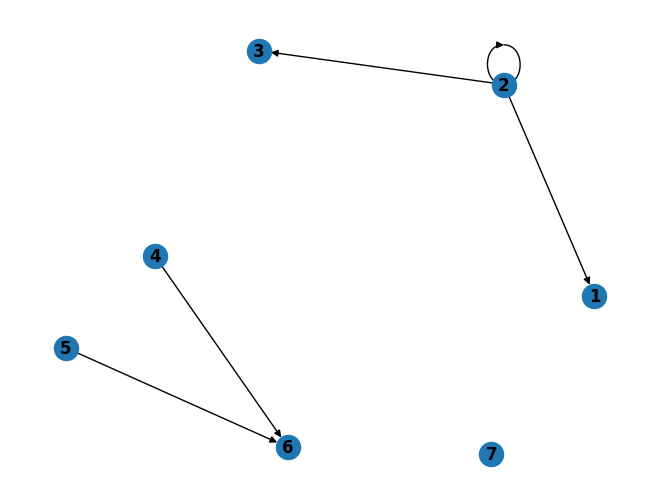

In [15]:
# Podemos visualizar el grafo sintáctico actual
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout
nx.draw_kamada_kawai(semantic_graph, with_labels=True, font_weight='bold')